# Project Information
___

<big>Dataset contains sales data of **items sold across 10 Stores** of a Company</big>

<big>Data File : `Items.csv`</big>

<big>**Project Task** : To Predict the Sales figures if an Item at a given Outlet (`Item_Outlet_Sales` column)</big>

### Importing required libraries
___

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')

%matplotlib inline

### Loading the Data
___

In [2]:
df = pd.read_csv('Items.csv')

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Understanding the Data
___

In [3]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 4.0 MB


<big><font color='red'>OBSERVATION</font> : Missing / Null values present in the `Item_Weight` and `Outlet_Size` Columns</big>

In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Count of Unique items for each column of Dataset

In [6]:
df.apply(lambda x : x.nunique())

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

#### Categorical Columns and thier unique values

In [7]:
cat_columns = [col_name for col_name in df.dtypes.index if df.dtypes[col_name]=='object']

cat_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

<big>We can leave out the **Identifier** columns `Item_Identifier` and `Outlet_Identifier` as they only used as  a way to reference to a certain set of characteristics defined by other associated columns</big>

In [8]:
cat_columns = [col_name for col_name in cat_columns if col_name.find('Identifier') < 0]

cat_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
for col_name in sorted(cat_columns, key=lambda x : df[x].nunique()):  # Sorted by unique value count
    heading = f"{col_name} - {df[col_name].nunique()}"
    
    print(heading,"="*(len(heading)+1), sep="\n")
    print(df[col_name].value_counts(), "\n\n")

Outlet_Size - 3
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Outlet_Location_Type - 3
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64 


Outlet_Type - 4
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64 


Item_Fat_Content - 5
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 


Item_Type - 16
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64

<big><font color='red'>OBSERVATION</font> : **`Item_Fat_Content`** has redundant values and can be reduced to 2 values : **Regular** & **Low Fat**</big>

In [10]:
df['Item_Fat_Content'].apply(lambda x : 'Regular' if x in ("Regular", 'reg') else "Low Fat").value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(lambda x :'Regular' \
                                                      if x in ("Regular", 'reg') \
                                                      else "Low Fat")

df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Data Preprocessing
___

### 1. Dealing with missing values of `Item_Weight` & `Outlet_Size`

### `Item_Weight`

In [12]:
df['Item_Weight'].isnull().sum()  # Number of Missing Values

1463

In [13]:
df.groupby('Item_Identifier').count()['Item_Weight']

Item_Identifier
DRA12    6
DRA24    5
DRA59    6
DRB01    2
DRB13    5
        ..
NCZ30    6
NCZ41    5
NCZ42    5
NCZ53    4
NCZ54    5
Name: Item_Weight, Length: 1559, dtype: int64

In [14]:
df[df['Item_Identifier']=="DRA24"][['Item_Weight', 'Item_Fat_Content', 'Item_MRP']]

,Item_Weight,Item_Fat_Content,Item_MRP
1148,19.35,Regular,164.6868
2879,NaN,Regular,163.2868
4130,19.35,Regular,163.8868
4416,NaN,Regular,165.7868
4900,19.35,Regular,163.3868
6863,19.35,Regular,165.0868
8195,19.35,Regular,162.4868


<big>As there are multiple entries for `Item_Weight` for each Item_ID (`Item_Identifier`), we can fill the missing weight values with the mean Weight for that Item_ID</big>

In [15]:
item_weight_pivot = pd.pivot_table(data=df,
                                   values=['Item_Weight'],
                                   index=['Item_Identifier'])

item_weight_pivot

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [16]:
items_missing_weight = df['Item_Weight'].isnull()

**Checking for `Item_Identifier` values** with missing Weights & **also absent in the pivot table** (mean values)

In [17]:
for i, item_id in enumerate(df['Item_Identifier']):
    if items_missing_weight[i]:
        if item_id not in item_weight_pivot.index:
            print(i, "\t", item_id)

927 	 FDN52
1922 	 FDK57
4187 	 FDE52
5022 	 FDQ60


In [18]:
df[df['Item_Identifier'].isin(("FDN52",
                               "FDK57",
                               "FDE52",
                               "FDQ60"))][['Item_Weight',
                                           'Item_Fat_Content',
                                           'Item_MRP',
                                           'Item_Type']]

,Item_Weight,Item_Fat_Content,Item_MRP,Item_Type
927,NaN,Regular,86.9198,Frozen Foods
1922,NaN,Low Fat,120.0440,Snack Foods
4187,NaN,Regular,88.9514,Dairy
5022,NaN,Regular,121.2098,Baking Goods


In [19]:
# for i, item_id in enumerate(df['Item_Identifier']):
#     if items_missing_weight[i]:
#         if item_id not in item_weight_pivot.index:
#             item_info = df[['Item_Type', 'Item_Fat_Content', 'Item_MRP']].loc[i]
#             type_ = item_info['Item_Type']
#             fat_ = item_info['Item_Fat_Content']
#             mrp_ = item_info['Item_MRP']
            
#             avg_vals = df[(df['Item_Fat_Content']==fat_) \
#                           & (df['Item_Type']==type_)][['Item_Weight', 'Item_MRP']].mean()
            
#             avg_wt = avg_vals['Item_Weight']
#             avg_mrp = avg_vals['Item_MRP']
            
#             item_wt = round(mrp_ * avg_wt / avg_mrp, 3)
            
#             print(i, item_wt, sep="\t")

### Filling missing `Item_Weight` values

In [20]:
df['Item_Weight'].isnull().sum()

1463

Using **Average MRP** and **Average Weight** for the specific **`Item_Type`** of the Product to proportionally assign Item_weight

In [21]:
for i, item_id in enumerate(df['Item_Identifier']):
    if items_missing_weight[i]:
        
        if item_id in item_weight_pivot.index:
            # If Item is present in the pivot table
            df['Item_Weight'][i] = round(item_weight_pivot.loc[item_id][0], 3)
        
        else:
            # If item is NOT present in the pivot table
            item_info = df[['Item_Type', 'Item_Fat_Content', 'Item_MRP']].loc[i]
            
            type_ = item_info['Item_Type']
            fat_ = item_info['Item_Fat_Content']
            item_mrp = item_info['Item_MRP']
            
            # Getting Mean Values from main dataset
            avg_vals = df[(df['Item_Fat_Content']==fat_) \
                          & (df['Item_Type']==type_)][['Item_Weight', 'Item_MRP']].mean()
            
            avg_wt, avg_mrp = avg_vals['Item_Weight'], avg_vals['Item_MRP']
            
            # Assigning Item_Weight proprtional to Mean Weight and Mean MRP values
            df['Item_Weight'][i] = round(item_mrp * avg_wt / avg_mrp, 3)

/tmp/ipykernel_15381/3639405752.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Weight'][i] = round(item_weight_pivot.loc[item_id][0], 3)
/tmp/ipykernel_15381/3639405752.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Weight'][i] = round(item_mrp * avg_wt / avg_mrp, 3)


In [22]:
df['Item_Weight'].isnull().sum()

0

In [23]:
df[df['Item_Identifier'].isin(("FDN52",
                               "FDK57",
                               "FDE52",
                               "FDQ60"))][['Item_Weight',
                                           'Item_Fat_Content',
                                           'Item_MRP',
                                           'Item_Type']]

,Item_Weight,Item_Fat_Content,Item_MRP,Item_Type
927,8.317,Regular,86.9198,Frozen Foods
1922,10.520,Low Fat,120.0440,Snack Foods
4187,7.862,Regular,88.9514,Dairy
5022,10.943,Regular,121.2098,Baking Goods


### `Outlet_Size`

In [24]:
df['Outlet_Size'].isnull().sum()

2410

In [25]:
# Dataset with only 'Outlet' Details

df_outlet = df[[col_name for col_name in df.columns if col_name.startswith('Outlet')]]

df_outlet.head()

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,OUT010,1998,NaN,Tier 3,Grocery Store
4,OUT013,1987,High,Tier 3,Supermarket Type1


#### Using `Outlet_Type` and `Outlet_Location_Type` values to predict the missing values of `Outlet_Size`

In [26]:
df_temp = df_outlet[df_outlet['Outlet_Size'].isnull()][['Outlet_Type', 'Outlet_Location_Type']]

df_temp.value_counts()

Outlet_Type        Outlet_Location_Type
Supermarket Type1  Tier 2                  1855
Grocery Store      Tier 3                   555
dtype: int64

<big>We need to find the values for `Outlet_Size` for:<br>
- **Supermarket Type1** outlets in **Tier 2** locations ; and 
- **Grocery Store** outlets in **Tier 3** locations</big>

#### Checking the values in main dataset

In [27]:
df[(df['Outlet_Type']=="Supermarket Type1")\
   & (df['Outlet_Location_Type']=="Tier 2")]['Outlet_Size'].value_counts()

Small    930
Name: Outlet_Size, dtype: int64

<big><font color='red'>OBSERVATION</font> : `Outlet_Size` for `Supermarket Type1` outlets in `Tier 2` locations is **Small**</big>

In [28]:
df[df['Outlet_Type']=="Grocery Store"][['Outlet_Location_Type', 'Outlet_Size']].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          528
dtype: int64

In [29]:
df[df['Outlet_Type']=="Grocery Store"]['Outlet_Size'].mode()[0]

'Small'

In [30]:
df[df['Outlet_Location_Type']=="Tier 3"][['Outlet_Type', 'Outlet_Size']].value_counts()

Outlet_Type        Outlet_Size
Supermarket Type3  Medium         935
Supermarket Type1  High           932
Supermarket Type2  Medium         928
dtype: int64

<big><font color='red'>OBSERVATION</font> : `Outlet_Size` for `Grocery Store` outlets in `Tier 3` locations is Not Available. <br><br>However, Checking the **mode value** of Outlet Size for all the Grocery Stores and logically analyzing the Outlet_size of all the outlets in **Tier 3** locations, It is safe to assume the value to be **Small** as a higher / bigger outlet size could easily be labelled as a Supermarket</big>

### Filling missing `Outlet_Size` values

In [31]:
df['Outlet_Size'].isna().sum()

2410

In [32]:
for i, size in enumerate(df['Outlet_Size']):
    if df['Outlet_Size'][i] is np.nan:
        df['Outlet_Size'][i] = 'Small'


/tmp/ipykernel_15381/2735138296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlet_Size'][i] = 'Small'


In [33]:
df['Outlet_Size'].isna().sum()

0

In [34]:
df['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [35]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### `Item_Visibility`

In [36]:
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

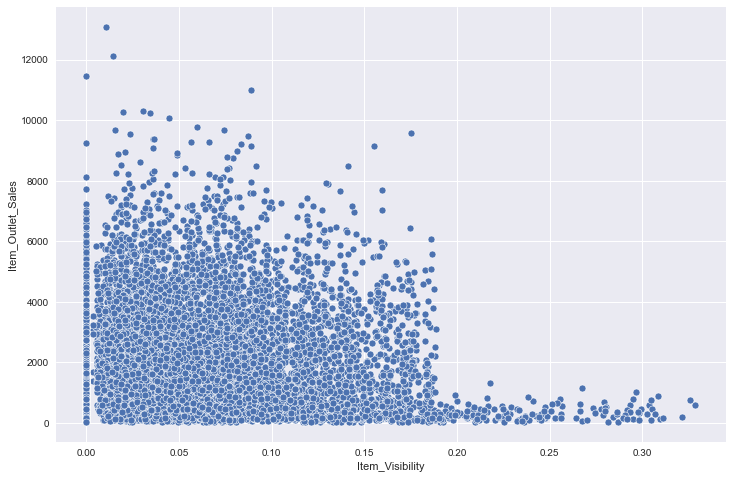

In [37]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df, x="Item_Visibility", y="Item_Outlet_Sales")

<big>The `0` values for `Item_Visibility` are also missing values. To fill these values we will use the **mean of non-zero visibility values** for its `Item_Type`</big>

In [38]:
mean_visibility_by_type = {}

for item_type in sorted(df['Item_Type'].unique()):
    mean_visibility_by_type[item_type] = df[(df['Item_Type'] == item_type) \
                                           & (df['Item_Visibility'] > 0)]['Item_Visibility'].mean()

mean_visibility_by_type

{'Baking Goods': 0.07433118773300167,
 'Breads': 0.07106850242735041,
 'Breakfast': 0.0881264581869159,
 'Canned': 0.07177910014772727,
 'Dairy': 0.07670085280745341,
 'Frozen Foods': 0.06980412990186335,
 'Fruits and Vegetables': 0.07371872979912664,
 'Hard Drinks': 0.07054673574111675,
 'Health and Hygiene': 0.05895751431622177,
 'Household': 0.06496310209429569,
 'Meat': 0.06535955484444445,
 'Others': 0.06402977602515723,
 'Seafood': 0.07997448504999999,
 'Snack Foods': 0.07086596053091872,
 'Soft Drinks': 0.06926435591970802,
 'Starchy Foods': 0.07518351486466165}

In [39]:
for i, visibility in enumerate(df['Item_Visibility']):
    if visibility == 0:
        type_ = df['Item_Type'][i]
        df['Item_Visibility'][i] = mean_visibility_by_type[type_]

/tmp/ipykernel_15381/2337892710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Visibility'][i] = mean_visibility_by_type[type_]


<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

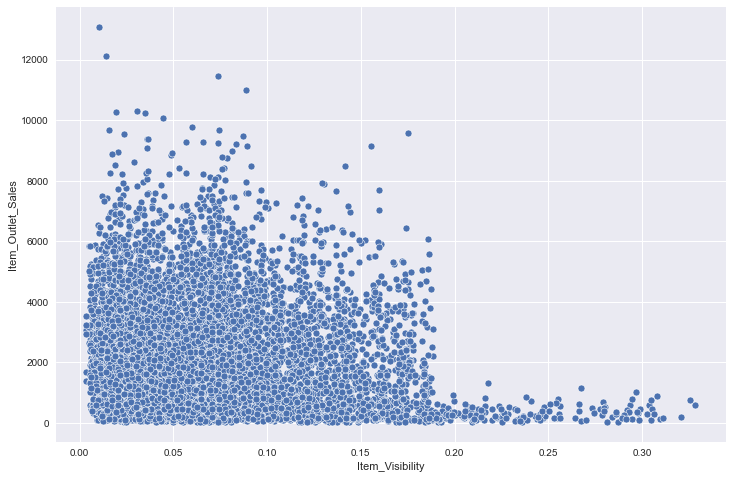

In [40]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df, x="Item_Visibility", y="Item_Outlet_Sales")

### `Item_Identifier`

Carefully observing the Item_Identifier values, We will find that the first 2 charachters of the Identifier belongs to a certain category

In [41]:
sorted(df['Item_Identifier'].apply(lambda x : x[0:2]).unique())

['DR', 'FD', 'NC']

Creating a new column to accommodate this category

In [42]:
df['Item_Category'] = df['Item_Identifier'].apply(lambda x : x[0:2])

### `Item_Type`

In [43]:
df['Item_Type'].value_counts().sort_index()

Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: Item_Type, dtype: int64

In [44]:
df.groupby('Item_Type')['Item_Category'].value_counts()

Item_Type              Item_Category
Baking Goods           FD                648
Breads                 FD                251
Breakfast              FD                110
Canned                 FD                649
Dairy                  FD                542
                       DR                140
Frozen Foods           FD                856
Fruits and Vegetables  FD               1232
Hard Drinks            DR                214
Health and Hygiene     NC                520
Household              NC                910
Meat                   FD                425
Others                 NC                169
Seafood                FD                 64
Snack Foods            FD               1200
Soft Drinks            DR                445
Starchy Foods          FD                148
Name: Item_Category, dtype: int64

<big>Analyzing the distribution of `Item_Category` Values over different `Item_Type` values, we can conclude that the Item Categories are as follows:</big>
- `FD` -> **Food**
- `DR` -> **Drinks**
- `NC` -> **Non Consumables**

In [45]:
df['Item_Category'] = df['Item_Category'].map({'FD' : 'Food',
                                               'DR' : 'Drinks',
                                               'NC' : 'Non Consumables'})

df['Item_Category'].value_counts()

Food               6125
Non Consumables    1599
Drinks              799
Name: Item_Category, dtype: int64

<big>Also to note that `Non Consumables` like that of type **Household** etc. are **Non Edible** Items and this should reflect in the `Item_Fat_Content` column for these Items as well.</big>

In [46]:
df.loc[df['Item_Category']=="Non Consumables", 'Item_Fat_Content'] = "Non Edible"

df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non Edible    1599
Name: Item_Fat_Content, dtype: int64

### `Outlet_Establishment_Year`

In [47]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

<big>It is better to store the age of the establshment</big>

In [48]:
from datetime import datetime

df['Outlet_Years'] = datetime.now().year - df['Outlet_Establishment_Year']

df['Outlet_Years'].value_counts()

36    1463
34     932
22     930
24     930
17     930
19     929
12     928
14     926
23     555
Name: Outlet_Years, dtype: int64

In [49]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,22
3,FDX07,19.20,Regular,0.073719,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,23
4,NCD19,8.93,Non Edible,0.064963,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non Consumables,34


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Category              8523 non-null   object 
 13  Outlet_Years               8523 non-null   int64

## Exploratory Data Analysis
___

In [51]:
sns.set_context('talk')

#### Distribution of Items by `Item_Weight`

Text(0.5, 1.0, 'Distribution of Items by Weight')

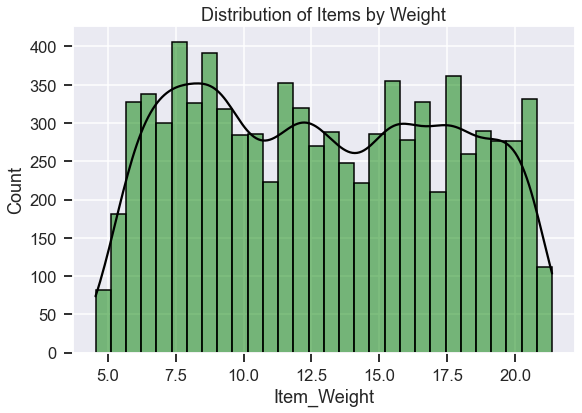

In [52]:
plt.figure(figsize=(9, 6))

ax = sns.histplot(data=df, x='Item_Weight', kde=True, bins=30, color='green')

ax.lines[0].set_color('black')

plt.title("Distribution of Items by Weight")

#### Distribution of Items by `Item_Visibility`

Text(0.5, 1.0, 'Distribution of Items by Visibility')

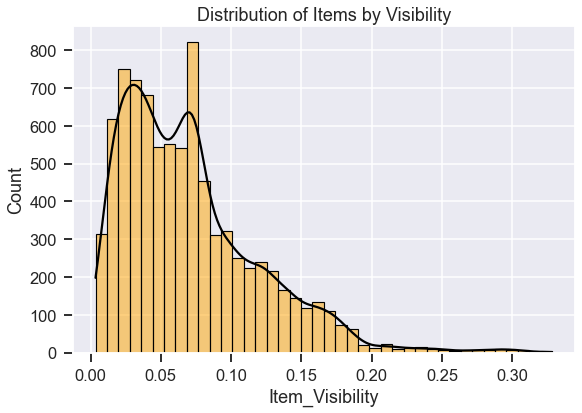

In [53]:
plt.figure(figsize=(9, 6))

ax = sns.histplot(data=df, x='Item_Visibility', kde=True, bins=40, color='orange')

ax.lines[0].set_color('black')

plt.title("Distribution of Items by Visibility")

#### Distribution of Items by `Item_Fat_Content`

Text(0.5, 1.0, 'Distribution of Items by Fat Content')

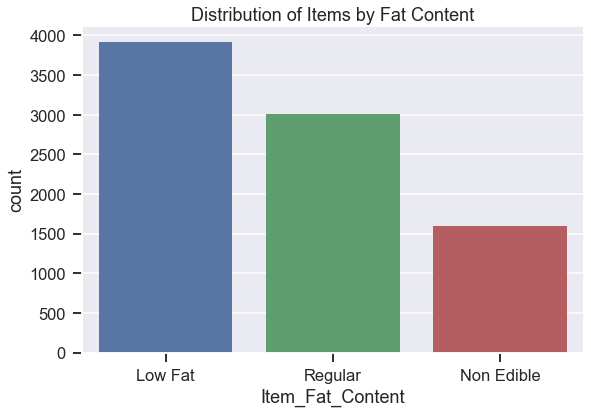

In [54]:
plt.figure(figsize=(9, 6))

sns.countplot(data=df, x='Item_Fat_Content')

plt.title("Distribution of Items by Fat Content")

#### Distribution of Items by `Item_Category`

Text(0.5, 1.0, 'Distribution of Items by Category')

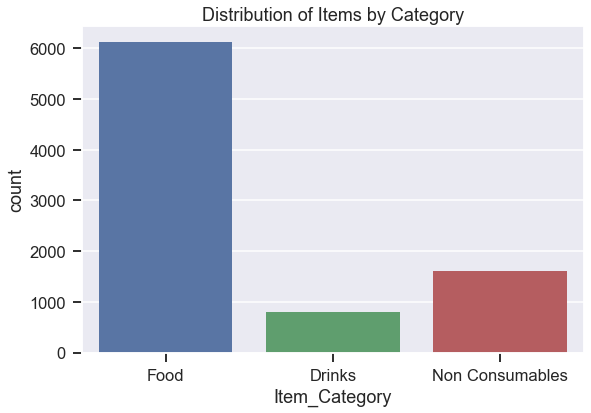

In [55]:
plt.figure(figsize=(9, 6))

sns.countplot(data=df, x='Item_Category')

plt.title("Distribution of Items by Category")

<font color='red'>**OBSERVATION**</font> : The Number of **Food** Items far outnumber the Items available in other categories

Text(0.5, 1.0, 'Distribution of Items by Category and Fat Content')

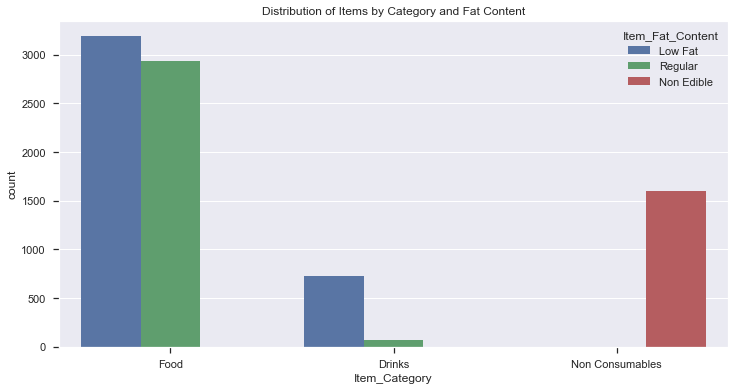

In [56]:
sns.set_context('notebook')

plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='Item_Category', hue="Item_Fat_Content")

plt.title("Distribution of Items by Category and Fat Content")

<font color='red'>**OBSERVATION**</font> : While the number of `Food` items with different Fat Contents is almost equally distributed, **Low Fat drink options dominate the `Drinks` Category**

#### Distribution of Items by `Item_Type`

Text(0.5, 1.0, 'Distribution of Items by Type')

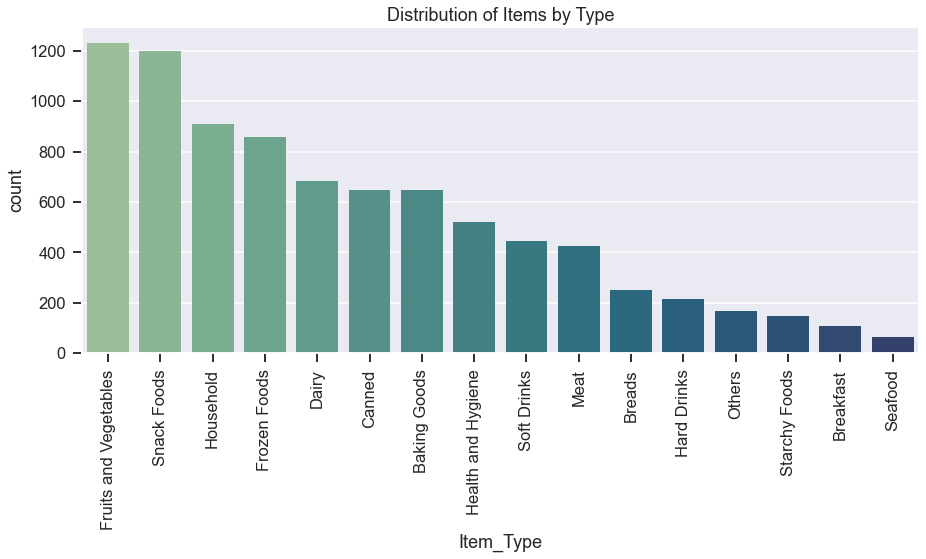

In [57]:
sns.set_context('talk')

plt.figure(figsize=(15, 6))

sns.countplot(data=df, x='Item_Type', palette="crest",
             order = df['Item_Type'].value_counts().index)

plt.xticks(rotation = 90)

plt.title("Distribution of Items by Type")

In [58]:
df_temp = df.groupby('Item_Type')[['Item_Weight', 'Item_MRP']].mean().reset_index()

df_temp

,Item_Type,Item_Weight,Item_MRP
0,Baking Goods,12.283245,126.380766
1,Breads,11.297689,140.952669
2,Breakfast,12.779727,141.788151
3,Canned,12.403320,139.763832
4,Dairy,13.371814,148.499208
5,Frozen Foods,12.777187,138.503366
6,Fruits and Vegetables,13.236713,144.581235
7,Hard Drinks,11.456238,137.077928
8,Health and Hygiene,13.052327,130.818921
9,Household,13.524780,149.424753


#### Mean `Item_Weight` by `Item_Type`

Text(0.5, 1.0, 'Mean Item_Weight by Item_Type')

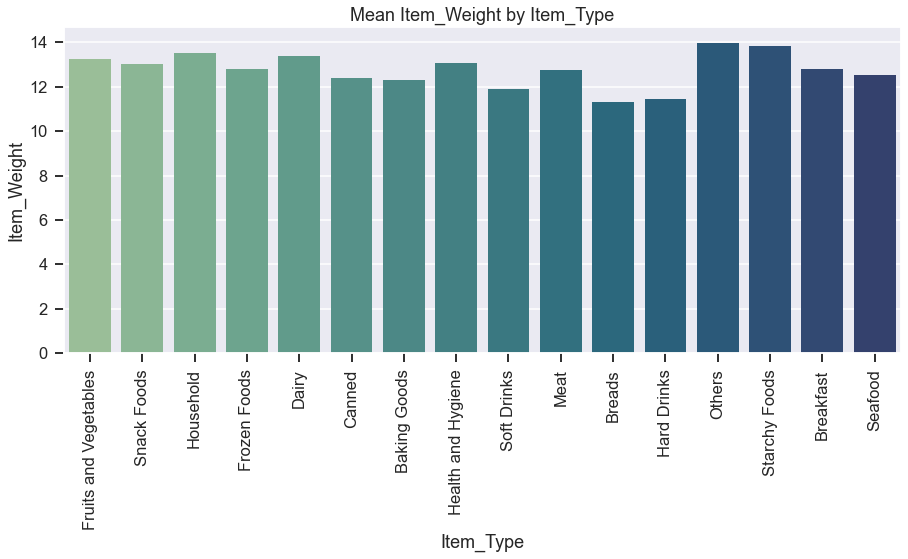

In [59]:
plt.figure(figsize=(15, 6))

sns.barplot(data=df_temp, x='Item_Type', y='Item_Weight', palette="crest",
             order = df['Item_Type'].value_counts().index)

plt.xticks(rotation = 90)

plt.title("Mean Item_Weight by Item_Type")

<font color='red'>**OBSERVATION**</font>:<br>**Breads** and **Hard Drinks** are the generally **LIGHTEST** Item Types whereas **Others** and **Starchy Foods** are generally the **HEAVIEST** Item Types

#### Mean `Item_MRP` by `Item_Type`

Text(0.5, 1.0, 'Mean Item_MRP by Item_Type')

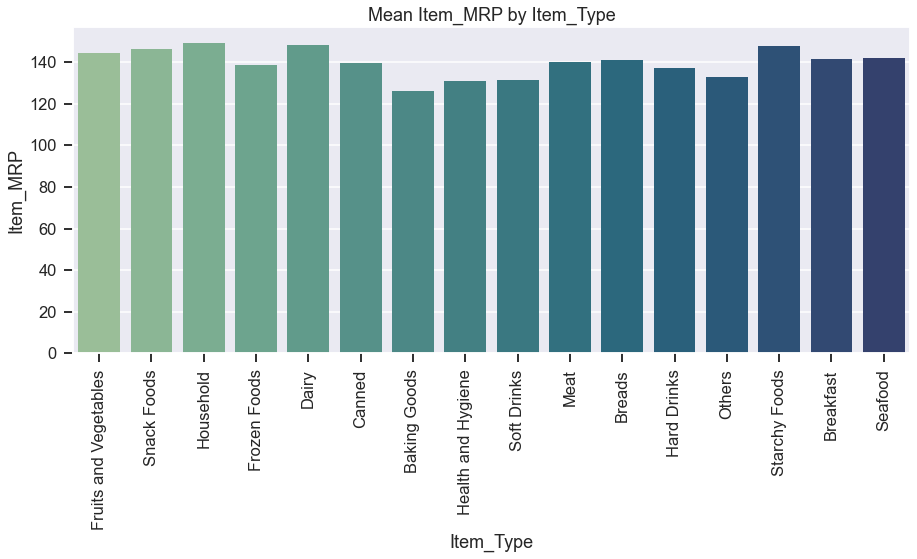

In [60]:
plt.figure(figsize=(15, 6))

sns.barplot(data=df_temp, x='Item_Type', y='Item_MRP', palette="crest",
             order = df['Item_Type'].value_counts().index)

plt.xticks(rotation = 90)

plt.title("Mean Item_MRP by Item_Type")

<font color='red'>**OBSERVATION**</font>:<br> **Baking Goods** are the generally **LEAST EXPENSIVE** whereas **Household**, **Dairy** and **Starchy Foods** are generally the **MOST EXPENSIVE** Item Types

#### Distribution of Items by `Item_MRP`

Text(0.5, 1.0, 'Distribution of Items by MRP')

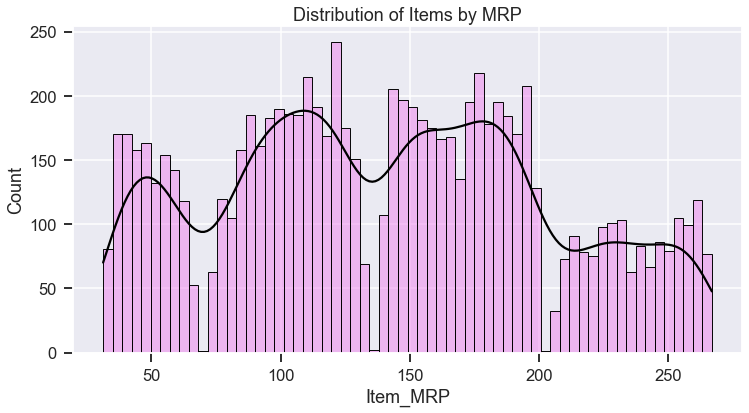

In [61]:
plt.figure(figsize=(12, 6))

ax = sns.histplot(data=df, x='Item_MRP', kde=True, bins=64, color='violet')

ax.lines[0].set_color('black')

plt.title("Distribution of Items by MRP")

<font color='red'>**OBSERVATION**</font> : The Distribution of Items by MRP indicates towards **4 Groups** in the terms of MRP Values

**Group 1 : Least Expensive**

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

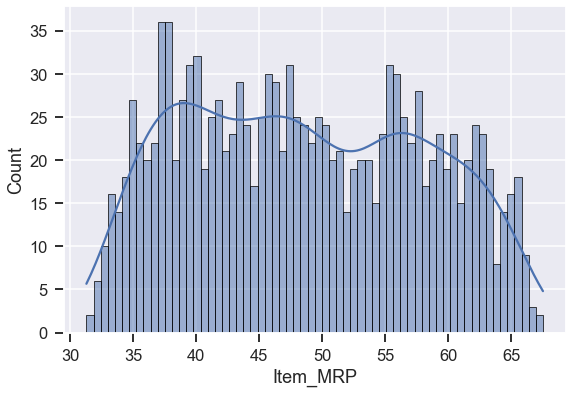

In [62]:
plt.figure(figsize=(9, 6))

sns.histplot(df[df['Item_MRP'] < 70]['Item_MRP'], bins=64, kde=True)

**Item Types in this Group**

Text(0.5, 1.0, 'Items distribution by Type in Least Expensive MRP Group')

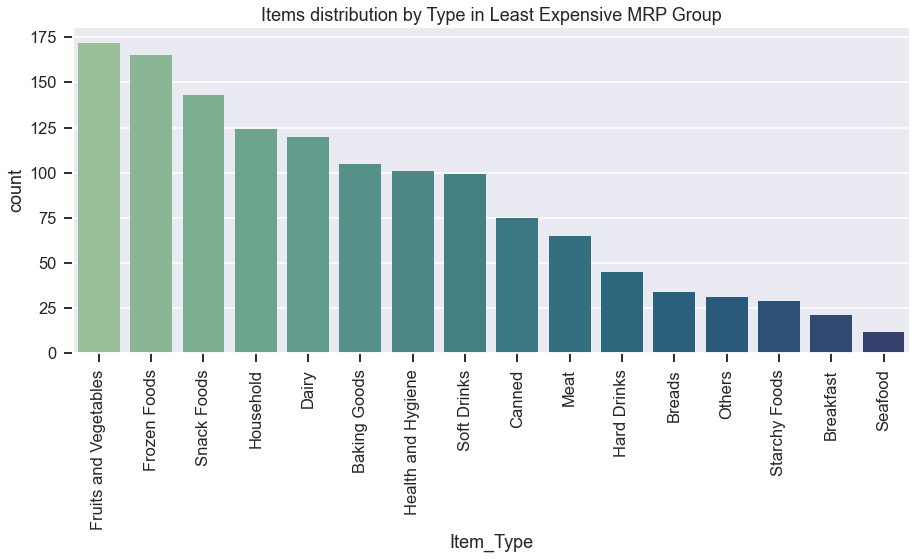

In [63]:
plt.figure(figsize=(15, 6))

sns.countplot(data=df[df['Item_MRP'] < 70], x='Item_Type', palette="crest",
             order = df[df['Item_MRP'] < 70]['Item_Type'].value_counts().index)

plt.xticks(rotation=90)

plt.title('Items distribution by Type in Least Expensive MRP Group')

In [64]:
df[df['Item_MRP'] < 70]['Item_Weight'].mean()

12.688456375838927

**Average Item Weights for Item Types this Group**

In [65]:
# plt.figure(figsize=(15, 6))

# sns.barplot(data=df[df['Item_MRP'] < 70].groupby('Item_Type')['Item_Weight'].mean().reset_index(),
#             x='Item_Type', y='Item_Weight', palette="crest",
#             order = df[df['Item_MRP'] < 70]['Item_Type'].value_counts().index)

# plt.xticks(rotation=90)

# plt.title('Average Weight of different Type of Items in Least Expensive MRP Group')

**Group 4 : Most Expensive**

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

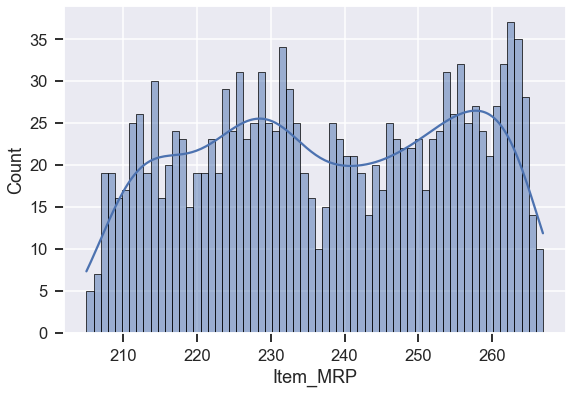

In [66]:
plt.figure(figsize=(9, 6))

sns.histplot(df[df['Item_MRP'] > 202]['Item_MRP'], bins=64, kde=True)

**Item Types in this Group**

Text(0.5, 1.0, 'Items distribution by Type in Most Expensive MRP Group')

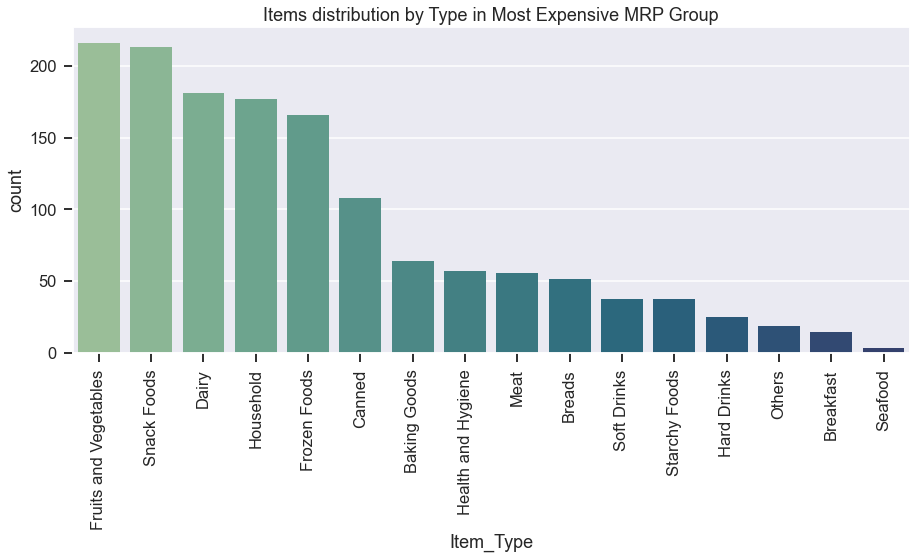

In [67]:
plt.figure(figsize=(15, 6))

sns.countplot(data=df[df['Item_MRP'] > 202], x='Item_Type', palette="crest",
             order = df[df['Item_MRP'] > 202]['Item_Type'].value_counts().index)

plt.xticks(rotation=90)

plt.title('Items distribution by Type in Most Expensive MRP Group')

In [68]:
df[df['Item_MRP'] > 202]['Item_Weight'].mean()

12.960920223932819

**Average Item Weights for Item Types this Group**

In [69]:
# plt.figure(figsize=(15, 6))

# sns.barplot(data=df[df['Item_MRP'] > 202].groupby('Item_Type')['Item_Weight'].mean().reset_index(),
#             x='Item_Type', y='Item_Weight', palette="crest",
#             order = df[df['Item_MRP'] > 202]['Item_Type'].value_counts().index)

# plt.xticks(rotation=90)

# plt.title('Average Weight of different Type of Items in Most Expensive MRP Group')

<font color='red'>**OBSERVATION**</font>:<br>
There is not much difference in the Item Weights when comparing the Least Expensive and Most Expensive MRP groups, so as to explain the drastic difference in MRP Values.<br>
Therefore the grouping in MRP values can assumed to be driven by different brands and qualities of the same products offered in a given Item Type.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Category              8523 non-null   object 
 13  Outlet_Years               8523 non-null   int64

**Total Sales by `Outlet_Identifier`**

In [71]:
df_temp = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().reset_index()

df_temp.sort_values('Outlet_Identifier')

,Outlet_Identifier,Item_Outlet_Sales
0,OUT010,1.883402e+05
1,OUT013,2.142664e+06
2,OUT017,2.167465e+06
3,OUT018,1.851823e+06
4,OUT019,1.796941e+05
5,OUT027,3.453926e+06
6,OUT035,2.268123e+06
7,OUT045,2.036725e+06
8,OUT046,2.118395e+06
9,OUT049,2.183970e+06


Text(0, 0.5, 'Total Sales (in Million)')

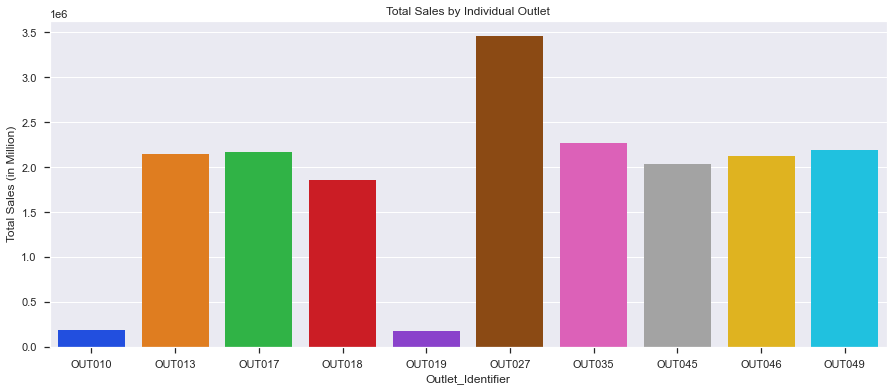

In [72]:
sns.set_context('notebook')

plt.figure(figsize=(15, 6))

sns.barplot(data=df_temp, x='Outlet_Identifier', y='Item_Outlet_Sales',
            palette="bright", order = sorted(df_temp['Outlet_Identifier'].unique()))

plt.title("Total Sales by Individual Outlet")
plt.ylabel("Total Sales (in Million)")

**Stores by `Outlet_Type`**

In [73]:
df_temp = df.groupby(['Outlet_Type', 'Outlet_Identifier']).count().reset_index()

df_temp[['Outlet_Identifier', 'Outlet_Type']]

,Outlet_Identifier,Outlet_Type
0,OUT010,Grocery Store
1,OUT019,Grocery Store
2,OUT013,Supermarket Type1
3,OUT017,Supermarket Type1
4,OUT035,Supermarket Type1
5,OUT045,Supermarket Type1
6,OUT046,Supermarket Type1
7,OUT049,Supermarket Type1
8,OUT018,Supermarket Type2
9,OUT027,Supermarket Type3


Text(0.5, 1.0, 'Distribution of Stores by Outlet_Type')

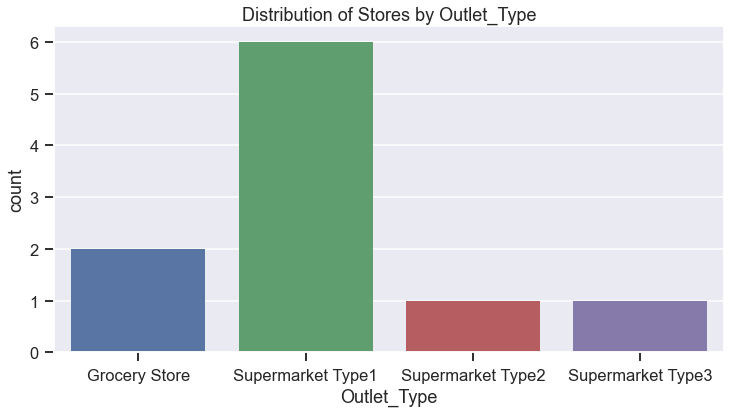

In [74]:
sns.set_context('talk')

plt.figure(figsize=(12, 6))

sns.countplot(data=df_temp, x='Outlet_Type')

plt.title("Distribution of Stores by Outlet_Type")

**Total Sales by `Outlet_Type`**

In [75]:
df_temp = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().reset_index()

df_temp.sort_values('Outlet_Type')

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,3.680343e+05
1,Supermarket Type1,1.291734e+07
2,Supermarket Type2,1.851823e+06
3,Supermarket Type3,3.453926e+06


Text(0, 0.5, 'Total Sales (in 10 Million)')

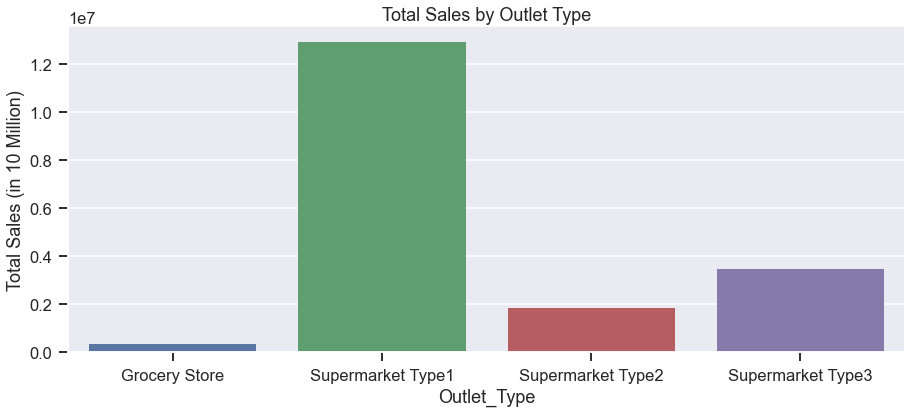

In [76]:
# sns.set_context('notebook')

plt.figure(figsize=(15, 6))

sns.barplot(data=df_temp, x='Outlet_Type', y='Item_Outlet_Sales',
            order = sorted(df_temp['Outlet_Type'].unique()))

plt.title("Total Sales by Outlet Type")
plt.ylabel("Total Sales (in 10 Million)")

**Stores by `Outlet_Location_Type`**

In [77]:
df_temp = df.groupby(['Outlet_Location_Type', 'Outlet_Identifier']).count().reset_index()

df_temp[['Outlet_Identifier', 'Outlet_Location_Type']]

,Outlet_Identifier,Outlet_Location_Type
0,OUT019,Tier 1
1,OUT046,Tier 1
2,OUT049,Tier 1
3,OUT017,Tier 2
4,OUT035,Tier 2
5,OUT045,Tier 2
6,OUT010,Tier 3
7,OUT013,Tier 3
8,OUT018,Tier 3
9,OUT027,Tier 3


Text(0.5, 1.0, 'Distribution of Stores by Outlet_Location_Type')

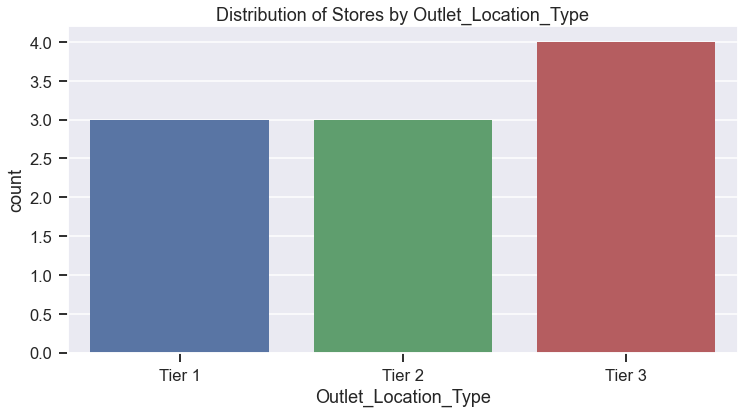

In [78]:
# sns.set_context('talk')

plt.figure(figsize=(12, 6))

sns.countplot(data=df_temp, x='Outlet_Location_Type')

plt.title("Distribution of Stores by Outlet_Location_Type")

**Total Sales by `Outlet_Location_Type`**

In [79]:
df_temp = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().reset_index()

df_temp.sort_values('Outlet_Location_Type')

,Outlet_Location_Type,Item_Outlet_Sales
0,Tier 1,4.482059e+06
1,Tier 2,6.472314e+06
2,Tier 3,7.636753e+06


Text(0, 0.5, 'Total Sales (in Million)')

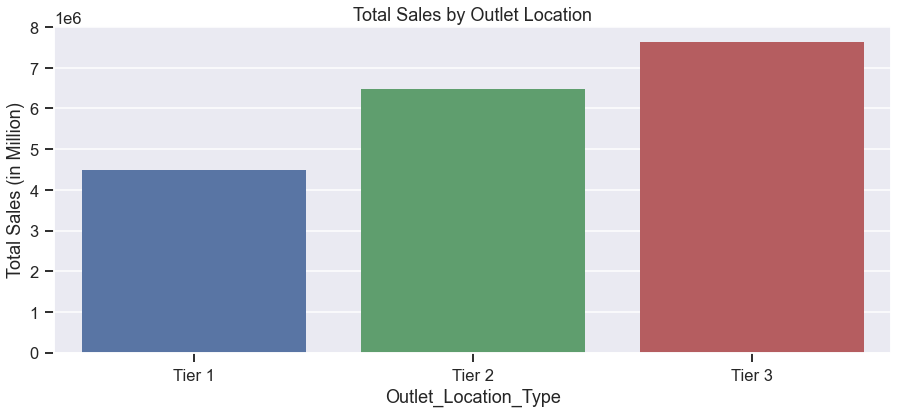

In [80]:
# sns.set_context('notebook')

plt.figure(figsize=(15, 6))

sns.barplot(data=df_temp, x='Outlet_Location_Type', y='Item_Outlet_Sales',
            order = sorted(df_temp['Outlet_Location_Type'].unique()))

plt.title("Total Sales by Outlet Location")
plt.ylabel("Total Sales (in Million)")

**Stores by `Outlet_Size`**

In [81]:
df_temp = df.groupby(['Outlet_Size', 'Outlet_Identifier']).count().reset_index()

df_temp[['Outlet_Identifier', 'Outlet_Size']]

,Outlet_Identifier,Outlet_Size
0,OUT013,High
1,OUT018,Medium
2,OUT027,Medium
3,OUT049,Medium
4,OUT010,Small
5,OUT017,Small
6,OUT019,Small
7,OUT035,Small
8,OUT045,Small
9,OUT046,Small


Text(0.5, 1.0, 'Distribution of Stores by Outlet_Size')

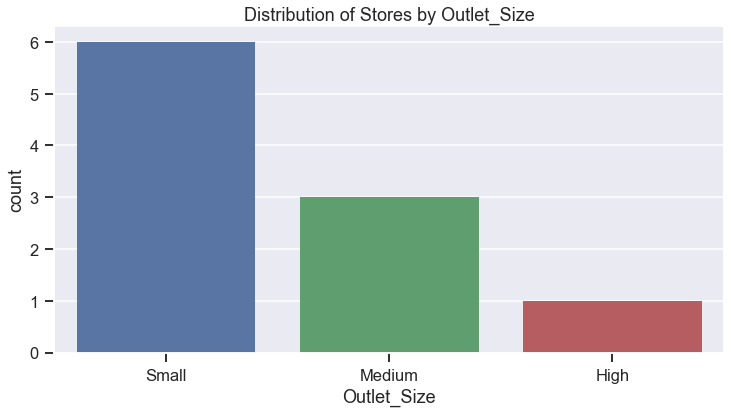

In [82]:
# sns.set_context('talk')

plt.figure(figsize=(12, 6))

sns.countplot(data=df_temp, x='Outlet_Size',
              order=reversed(df_temp['Outlet_Size'].unique()))

plt.title("Distribution of Stores by Outlet_Size")

**Total Sales by `Outlet_Size`**

In [83]:
df_temp = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().reset_index()

df_temp.sort_values('Outlet_Size', ascending=False)

,Outlet_Size,Item_Outlet_Sales
2,Small,8.958743e+06
1,Medium,7.489719e+06
0,High,2.142664e+06


Text(0, 0.5, 'Total Sales (in Million)')

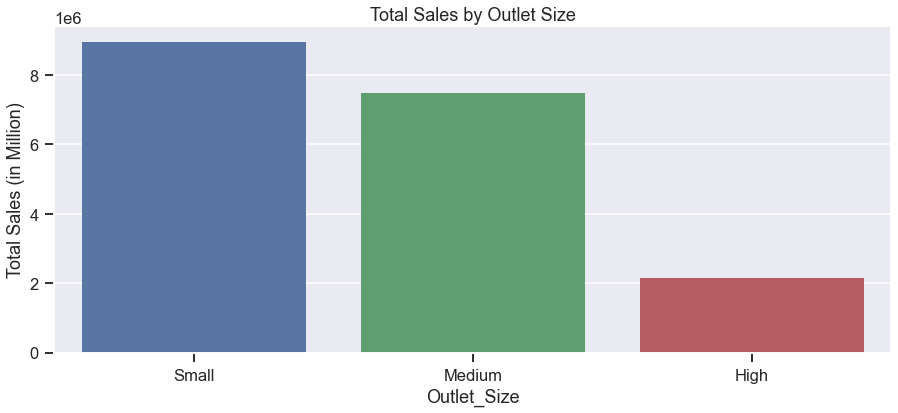

In [84]:
plt.figure(figsize=(15, 6))

sns.barplot(data=df_temp, x='Outlet_Size', y='Item_Outlet_Sales',
            order = reversed(df_temp['Outlet_Size'].unique()))

plt.title("Total Sales by Outlet Size")
plt.ylabel("Total Sales (in Million)")

In [85]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.018589,0.026210,-0.012880,0.013090,0.012880
Item_Visibility,-0.018589,1.000000,-0.005279,-0.078227,-0.133745,0.078227
Item_MRP,0.026210,-0.005279,1.000000,0.005020,0.567574,-0.005020
Outlet_Establishment_Year,-0.012880,-0.078227,0.005020,1.000000,-0.049135,-1.000000
Item_Outlet_Sales,0.013090,-0.133745,0.567574,-0.049135,1.000000,0.049135
Outlet_Years,0.012880,0.078227,-0.005020,-1.000000,0.049135,1.000000


<AxesSubplot:>

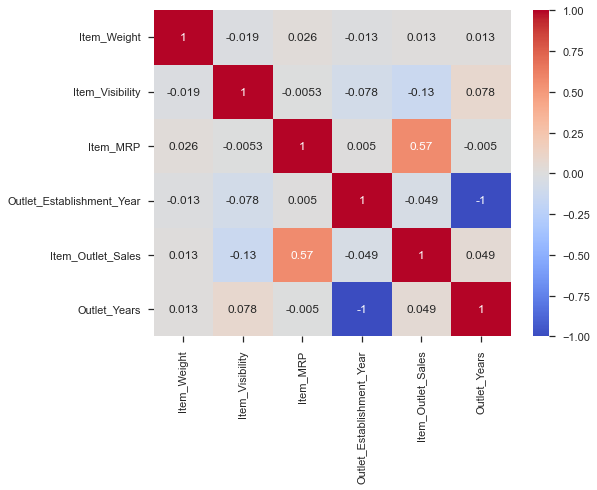

In [86]:
sns.set_context('notebook')

plt.figure(figsize=(8, 6))

sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')

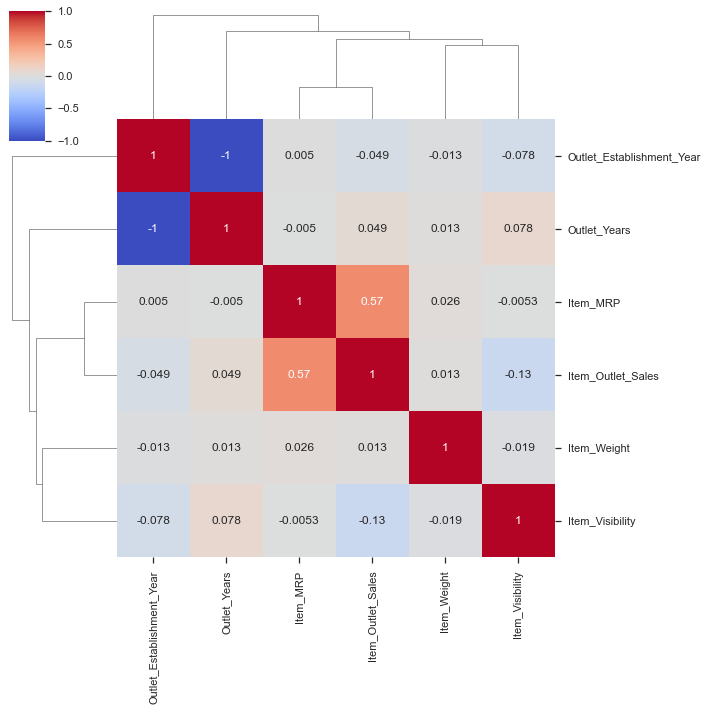

In [87]:
sns.clustermap(data=df.corr(), annot=True, cmap='coolwarm')

<big><font color='red'>OBSERVATION</font> : The `Item_Outlet_Sale` is **Most Correlated** with `Item_MRP`

## Dealing with Categorical Data
___

#### Label Encoding  `Item_Type` and `Outlet_Identifier`

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [90]:
le = LabelEncoder()

df['Item_Type'] = le.fit_transform(df['Item_Type'])


df['Item_Type'].value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

In [91]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [92]:
le = LabelEncoder()

df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

df['Outlet'].value_counts()

5    935
1    932
9    930
8    930
6    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet, dtype: int64

#### One Hot Encoding : `Item_Fat_Content`

In [93]:
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non Edible    1599
Name: Item_Fat_Content, dtype: int64

In [94]:
df = pd.get_dummies(data=df,
                    columns=['Item_Fat_Content']).drop(columns=['Item_Fat_Content_Non Edible'])

#### One Hot Encoding : `Item_Category`

In [95]:
df['Item_Category'].value_counts()

Food               6125
Non Consumables    1599
Drinks              799
Name: Item_Category, dtype: int64

In [96]:
df = pd.get_dummies(data=df,
                    columns=['Item_Category']).drop(columns=['Item_Category_Food'])

#### One Hot Encoding : `Outlet_Type`

In [97]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [98]:
df = pd.get_dummies(data=df,
                    columns=['Outlet_Type']).drop(columns=['Outlet_Type_Supermarket Type1'])

#### One Hot Encoding : `Outlet_Location_Type`

In [99]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [100]:
df = pd.get_dummies(data=df,
                    columns=['Outlet_Location_Type']).drop(columns=['Outlet_Location_Type_Tier 2'])

#### One Hot Encoding : `Outlet_Size`

In [101]:
df['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [102]:
df = pd.get_dummies(data=df,
                    columns=['Outlet_Size']).drop(columns=['Outlet_Size_High'])

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8523 non-null   object 
 1   Item_Weight                    8523 non-null   float64
 2   Item_Visibility                8523 non-null   float64
 3   Item_Type                      8523 non-null   int64  
 4   Item_MRP                       8523 non-null   float64
 5   Outlet_Identifier              8523 non-null   object 
 6   Outlet_Establishment_Year      8523 non-null   int64  
 7   Item_Outlet_Sales              8523 non-null   float64
 8   Outlet_Years                   8523 non-null   int64  
 9   Outlet                         8523 non-null   int64  
 10  Item_Fat_Content_Low Fat       8523 non-null   uint8  
 11  Item_Fat_Content_Regular       8523 non-null   uint8  
 12  Item_Category_Drinks           8523 non-null   u

In [104]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Item_Fat_Content_Regular,Item_Category_Drinks,Item_Category_Non Consumables,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,22,9,...,0,0,0,0,0,0,1,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,12,3,...,1,1,0,0,1,0,0,1,1,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,22,9,...,0,0,0,0,0,0,1,0,1,0
3,FDX07,19.20,0.073719,6,182.0950,OUT010,1998,732.3800,23,0,...,1,0,0,1,0,0,0,1,0,1
4,NCD19,8.93,0.064963,9,53.8614,OUT013,1987,994.7052,34,1,...,0,0,1,0,0,0,0,1,0,0


## Model Training

In [105]:
X = df.drop(columns=['Item_Identifier', 'Outlet_Identifier',
                     'Outlet_Establishment_Year', 'Item_Outlet_Sales'])

y = df['Item_Outlet_Sales']

In [106]:
# Scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Cross Validation
from sklearn.model_selection import cross_val_score, train_test_split

# Regressors
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from lightgbm import LGBMRegressor

from xgboost import XGBRegressor

models = [LinearRegression(),
          Ridge(),
          Lasso(),
          RandomForestRegressor(),
          ExtraTreesRegressor(),
          LGBMRegressor(),
          XGBRegressor()
         ]

X_scaled = MinMaxScaler().fit_transform(X)

CV RMS Scores:
LinearRegression      : 1129.983
Ridge                 : 1130.521
Lasso                 : 1130.524
RandomForestRegressor : 1139.974
ExtraTreesRegressor   : 1175.556
LGBMRegressor         : 1112.564
XGBRegressor          : 1168.159


Best Model : LGBMRegressor (1112.5635496914829)




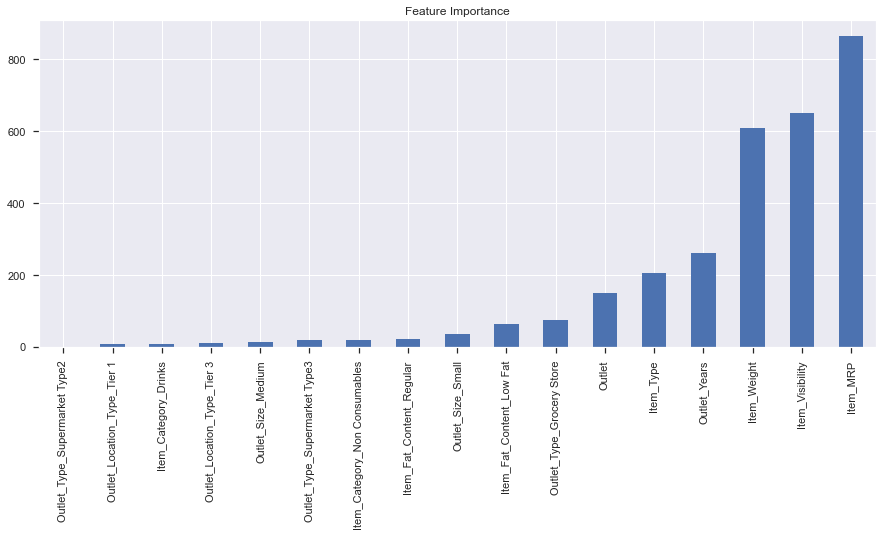

In [107]:
print("CV RMS Scores:","="*14, sep="\n")

cv_rms_scores = {}

for model in models[:]:
    model_name = type(model).__name__ 

    cv_rms = abs(cross_val_score(model, X_scaled, y, cv=5,
                                 scoring="neg_root_mean_squared_error").mean())
    
    cv_rms_scores[model_name] = cv_rms
    
    print(model_name.ljust(21), ":", round(cv_rms, 3))

print("\n")

best_cv_score = min(cv_rms_scores.values())
best_model = [model_ for model_,score_ in cv_rms_scores.items()
                                       if score_==best_cv_score][0]

print(f"Best Model : {best_model} ({best_cv_score})")

print("\n")

model = [model for model in models[:] if best_model==type(model).__name__][0]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

model.fit(X_train,y_train)
pred = model.predict(X_test)

if best_model in ('LinearRegression', 'Ridge', 'Lasso'):
    coef = pd.Series(model.coef_, X.columns).sort_values()
    coef.plot(kind='bar', title='Model Coefficients', figsize=(15,6))
else:
    coef = pd.Series(model.feature_importances_, X.columns).sort_values()
    coef.plot(kind='bar', title='Feature Importance', figsize=(15,6))

## Hyperparameter Tuning

In [108]:
from sklearn.model_selection import RandomizedSearchCV

params = {"num_leaves" : range(20, 51),                      # default 31
          "max_depth" : range(-5, 11),                       # default -1
          "learning_rate" : np.linspace(0.01, 0.25, 24),     # default 0.1
          "n_estimators" : range(100, 251),                  # default 100
         }

lgbm = RandomizedSearchCV(estimator=LGBMRegressor(),
                          param_distributions=params,
                          n_iter=20,
                          scoring="neg_root_mean_squared_error",
                          n_jobs=-1,
                          cv=5,
                          verbose=1
                         )

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01      , 0.02043478, 0.03086957, 0.04130435, 0.05173913,
       0.06217391, 0.0726087 , 0.08304348, 0.09347826, 0.10391304,
       0.11434783, 0.12478261, 0.13521739, 0.14565217, 0.15608696,
       0.16652174, 0.17695652, 0.1873913 , 0.19782609, 0.20826087,
       0.21869565, 0.22913043, 0.23956522, 0.25      ]),
                                        'max_depth': range(-5, 11),
                                        'n_estimators': range(100, 251),
                                        'num_leaves': range(20, 51)},
                   scoring='neg_root_mean_squared_error', verbose=1)

In [119]:
print(lgbm.best_params_)
print(abs(round(lgbm.best_score_,3)))

{'num_leaves': 29, 'n_estimators': 192, 'max_depth': 2, 'learning_rate': 0.05173913043478261}
1074.344


In [110]:
predictions = lgbm.predict(X_test)

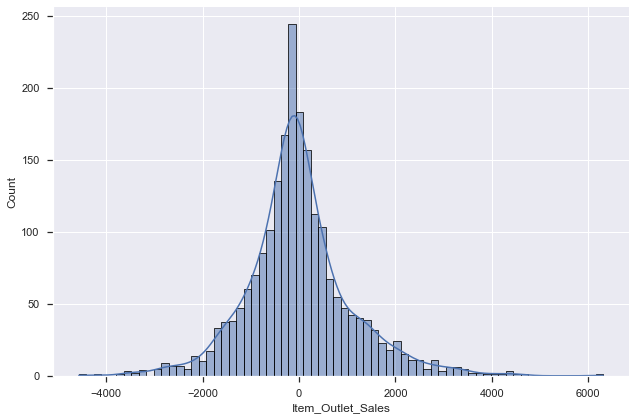

In [116]:
sns.displot(y_test-predictions, kde=True, height=6, aspect=1.5)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

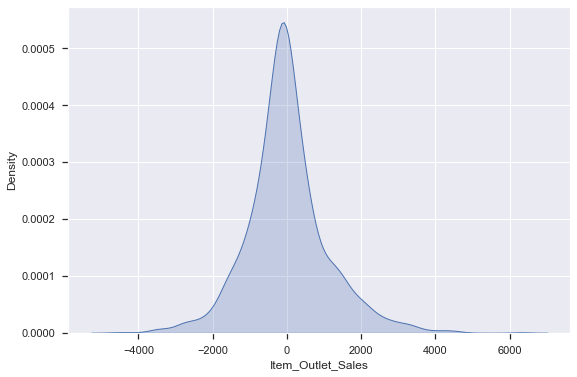

In [117]:
plt.figure(figsize=(9, 6))

sns.kdeplot(y_test-predictions, fill=True)

## Result
___

<big>We compared cross validation scores of various regression models to choose the best model, exhibiting the lowest RMSE value. Then were able to use Hyperparameter Tuning to improve the Cross Validation RMS Score of our best model from initial value of `1112.564` to final value of `1074.344` and have achieved an **almost perfect normal distribution curve** for the predicted values.</big>